# `Fitty`: First steps

**Author: Raibatak Das**  
[Last updated - **2024-SEP-09**]

This notebook introduces the Julia package `Fitty` for nonlinear least squares regression. 

Nonlinear least squares fitting is a widely used procedure to fit experimental data using a mathematical model. `Fitty.jl` can be used to estimate model parameters and their confidence intervals for such problems

In [ ]:
using PythonPlot
using Pkg
Pkg.activate("..")
import Fitty

In [2]:
# ONLY RELEVANT ON A MAC WITH RETINA DISPLAY

# # Run macro to produce high resolution plots
# # on a retina display
# @pyplot_retina
# # Update matplotlib settings
# mpl = PythonPlot.matplotlib
# mpl.rcParams["font.size"] = 14;
# mpl.rcParams["figure.dpi"] = 180;
# mpl.rcParams["axes.axisbelow"] = true;
# mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color = mpl.colormaps["Set1"].colors);

## 1. Quick start: Rosenbrock function

The Rosenbrock function defined below is a standard test problem for nonlinear least squares minimization:
$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$
This function has a global minima at (1, 1) that is hard to find because it lies within a narrow, curved valley [Ref: [Wikipedia](https://en.wikipedia.org/wiki/Rosenbrock_function)]

The function can be represented by a vector of residuals:
$$\begin{aligned}
\epsilon_1 & = 1 - x \\
\epsilon_2 & = 10(y - x^2)
\end{aligned}$$

whose sum of squares $$f(x, y) = \epsilon_1^2 + \epsilon_2^2$$ is to be minimized. 

The next code block sets up this problem and uses the `Fitty.nlsfit()` function to find optimal $x$ and $y$ starting with a guess far from the minima.

In [3]:
# Define residuals for Rosenbrock function
f(θ) = [1 - θ.x, 10*(θ.y - θ.x^2)]

# Minimize SSR starting with a non-optimal guess
guess = (x = -1.5, y = 1); # Starting guess away from global minima
fit = Fitty.nlsfit(f, guess);

Fit converged in 13 steps from intial guess [-1.5, 1.0]
to final estimate [1.0, 1.0]


The output of the `nlsfit` function contains the complete optimizer trajectory in parameter space starting with the initial guess. The plots below show the optimizer trajectory overlaid on a contour plot of the Rosenbrock function (left) and SSR values along the trajectory (right)

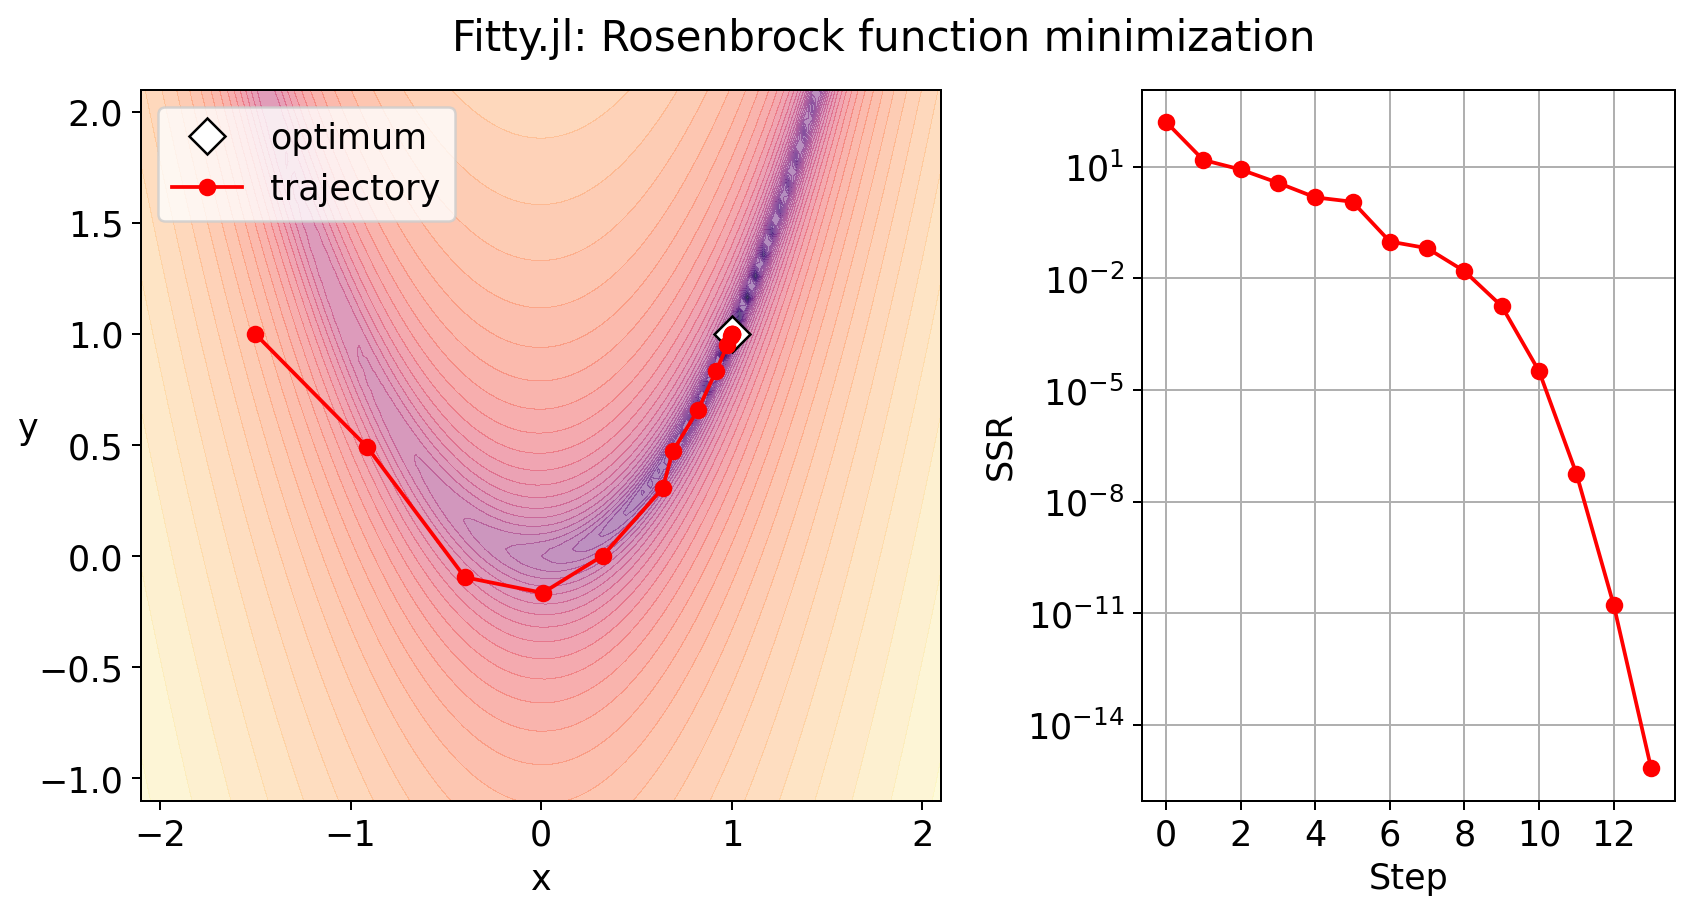

In [4]:
Rosenbrock(x, y) = sum(f((x = x, y= y)).^2)

x = collect(range(-2.1, 2.1, length = 100))
y = collect(range(-1.1, 2.1, length = 100))
z = log10.(Rosenbrock.(x', y))

fig, (ax0, ax1) = subplots(figsize = (11, 5), 
                           ncols = 2, width_ratios = [1.5, 1])

# Plot contours optimum and trajectory
ax0.plot([1], [1], "kD", ms = 10, mfc = "w", 
         label = "optimum")
ax0.contourf(x, y, z, levels = 40, cmap = "magma", 
            alpha = 0.5)

ax0.plot(fit.traj[:,1], fit.traj[:, 2], "ro-",
        ms = 6, label = "trajectory")
ax0.legend(loc = "upper left")
ax0.set_xlabel("x")
ax0.set_ylabel("y", rotation = 0)

# Plot SSR 
ax1.semilogy(fit.ssrvals, "ro-")
ax1.set_xlabel("Step")
ax1.set_xticks([0, 2, 4, 6, 8, 10, 12])
ax1.set_ylabel("SSR")
ax1.grid()

subplots_adjust(top = 0.9, wspace = 0.3)
suptitle("Fitty.jl: Rosenbrock function minimization");